In [3]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [23]:
image = Image.open('logo.jpeg')
#image resize 
image = image.resize((100, 100))
image = np.array(image)
image.shape

(100, 100, 3)

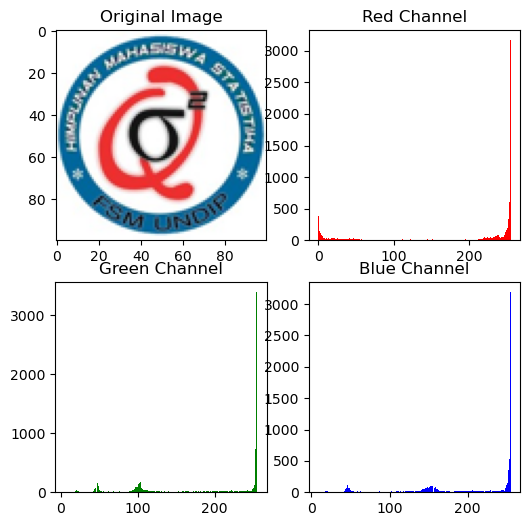

In [32]:
#flatten image
image_reshape = image.reshape(-1, 3)

red_channel = image_reshape[:, 0]
green_channel = image_reshape[:, 1]
blue_channel = image_reshape[:, 2]

#plotting
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.hist(red_channel, bins=256, color='red')
plt.title('Red Channel')
plt.subplot(2, 2, 3)
plt.hist(green_channel, bins=256, color='green')
plt.title('Green Channel')
plt.subplot(2, 2, 4)
plt.hist(blue_channel, bins=256, color='blue')
plt.title('Blue Channel')
plt.show()

# K-Means Clustering

In [36]:
df = pd.DataFrame(image_reshape, columns=['red', 'green', 'blue'])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
df['cluster'] = kmeans.predict(df)

In [54]:
centers[0].reshape(1, 3)

array([[30, 36, 42]], dtype=uint8)

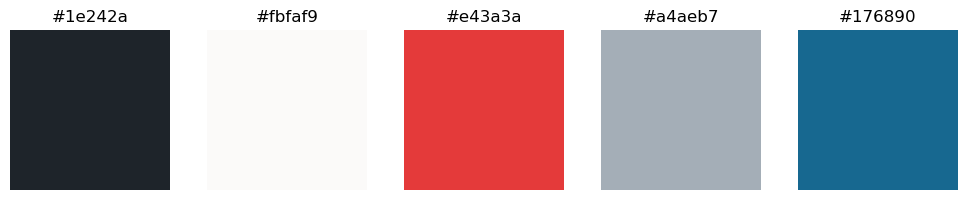

In [93]:
#get cluster centers
centers = kmeans.cluster_centers_

#convert centers to rgb color
centers = np.array(centers, dtype='uint8')

#show the colors in cluster
normalized_centers = centers / 255.
color_data = [[[i]] for i in normalized_centers]
# color_data
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

#rgb to hex
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)


# # Iterate through the colors and plot each one
for i,color in enumerate(color_data):   
    # Extract the RGB values from the nested array
    rgb = np.array(color)
    
    # Plot a single pixel with the specified color
    axs[i].imshow(rgb)
    axs[i].axis('off')  # Turn off axis labels
    axs[i].set_title(rgb2hex(*centers[i]))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [141]:
def import_image(image_path):
    image = Image.open(image_path)
    image = image.resize((100, 100))
    image = np.array(image)
    image_reshape = image.reshape(-1, 3)
    return image_reshape

def cluster_image(image_reshape, n_clusters=5):
    df = pd.DataFrame(image_reshape, columns=['red', 'green', 'blue'])
    kmeans = KMeans(n_clusters=n_clusters,n_init="auto")
    kmeans.fit(df)
    df['cluster'] = kmeans.predict(df)
    return df, kmeans

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

def plot_colors(model):
    centers = model.cluster_centers_
    n_clusters = len(centers)
    centers = np.array(centers, dtype='uint8')
    normalized_centers = centers / 255.
    color_data = [[[i]] for i in normalized_centers]
    nrow = n_clusters//2
    ncol = n_clusters//nrow + n_clusters%nrow
    fig, axs = plt.subplots(nrow, ncol)
    #auto adjust the layout
    plt.tight_layout()
    fig.patch.set_alpha(0.)
    for i,color in enumerate(color_data):   
        rgb = np.array(color)

        # Plot a single pixel with the specified color
        axs[i//ncol, i%ncol].imshow(rgb)
        axs[i//ncol, i%ncol].axis('off')
        axs[i//ncol, i%ncol].set_title(rgb2hex(*centers[i]))
        # axs[i].imshow(rgb)
        # axs[i].axis('off')  # Turn off axis labels
        # axs[i].set_title(rgb2hex(*centers[i]))

    plt.axis('off')
    plt.tight_layout()
    #transparent background
    plt.show()

def main():
    image_path = input('Enter the image path: ')
    n_colors = int(input('Enter the number of colors: '))
    image_reshape = import_image(image_path)
    df,model = cluster_image(image_reshape, n_colors)
    plot_colors(model)

In [142]:
3//2

1

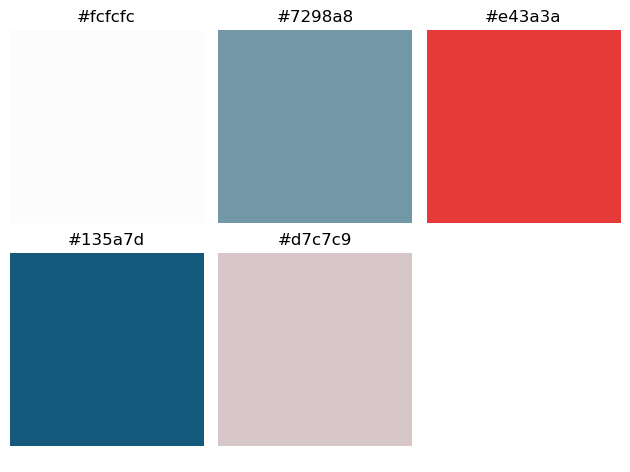

In [143]:
main()